# Matplotlib Fundamentals
## 🚩 Goals
1. Understand the difference between the two primary Matplotlib plotting frameworks
2. Identify the key components of an object-oriented plot
3. Build different variations of line, bar and pie charts, as well as scatterplots and histograms
4. Customize charts by adding custom titles, labels, legends, annotations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. Compatible Data Types
- Python list, tuple
- Numpy arrays
- Pandas series, dataframe

### 2. Plotting Dataframe
- When plotting a dataframe, Matplotlib will...
    - Use the 'index' as the x-axis
    - Plot each column as a separate series by default
- Plotting each series independently allows for improved customization

Text(0.5, 1.0, 'Product Sales and Profits')

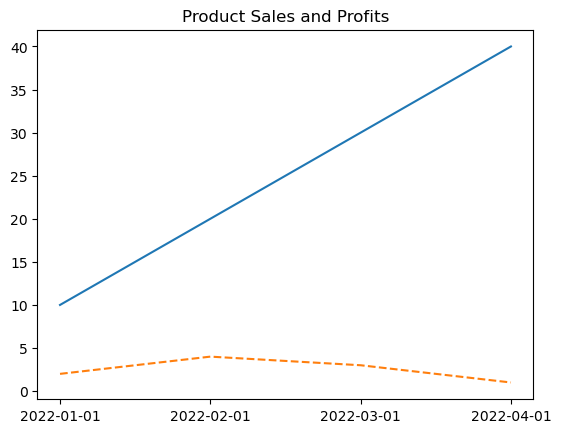

In [2]:
data_dict = {
    'Sales': [10, 20, 30, 40],
    'Profits': [2, 4, 3, 1],
    'Date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01']
}

df = pd.DataFrame(
    data_dict,
    columns=['Sales', 'Profits'],
    index=data_dict['Date']
)

fig, ax = plt.subplots()

# ax.plot(df)
ax.plot(df.index, df['Sales'])
ax.plot(df.index, df['Profits'], linestyle='--')
ax.set_title('Product Sales and Profits')

#### 📚 과제

In [10]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')

hotels['date'] = (
    pd.to_datetime('2018-12-31')
    - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D')
).astype('datetime64[ns]')

daily_revenue = (
    hotels
    .groupby('date')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
)
monthly_revenue = daily_revenue.resample('M').sum()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


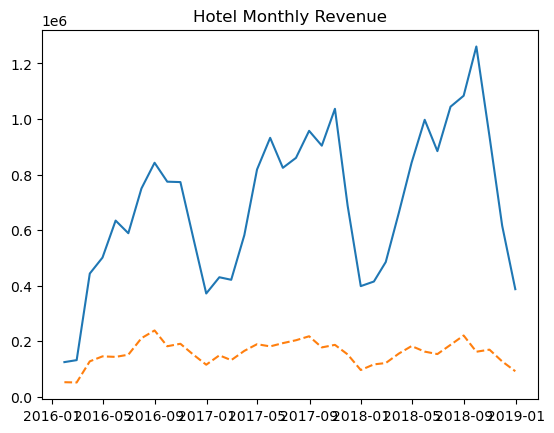

In [13]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], linestyle='--')
ax.set_title('Hotel Monthly Revenue');